In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from google.colab import drive

In [7]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [8]:
! unzip /content/gdrive/MyDrive/finaldata.zip

Streaming output truncated to the last 5000 lines.
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_13.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_130.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_131.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_132.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_133.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_134.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_135.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_136.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_137.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_138.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augmented_image_139.jpg  
  inflating: finaldata/New Masks Dataset/Test/Non Mask/augm

In [9]:
import os
main_dir = '/content/finaldata/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir = os.path.join(train_dir,'Mask')
train_nomask_dir = os.path.join(train_dir,'Non Mask')

In [10]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['1058.jpg', '0_0_2 copy 18.jpg', '0_0_24 copy 3.jpg', '1154.jpg', 'with_mask581.jpg', 'with_mask575.jpg', '1882.jpg', '1_0_1 copy 15.jpg', '0_0_3 copy 32.jpg', '2657.png']
['real_00075.jpg', '0_0_luozhixiang_0051.jpg', '0_0_baobeier_0014.jpg', '0_0_tianliang_0042.jpg', 'augmented_image_290.jpg', '431.jpg', '0_0_baibaihe_0236.jpg', '1_0_aidai_0049.jpg', '125.jpg', '309.jpg']


['/content/finaldata/New Masks Dataset/Train/Mask/1058.jpg', '/content/finaldata/New Masks Dataset/Train/Mask/0_0_2 copy 18.jpg', '/content/finaldata/New Masks Dataset/Train/Mask/0_0_24 copy 3.jpg', '/content/finaldata/New Masks Dataset/Train/Mask/1154.jpg', '/content/finaldata/New Masks Dataset/Train/Mask/with_mask581.jpg', '/content/finaldata/New Masks Dataset/Train/Mask/with_mask575.jpg', '/content/finaldata/New Masks Dataset/Train/Mask/1882.jpg', '/content/finaldata/New Masks Dataset/Train/Mask/1_0_1 copy 15.jpg']
['/content/finaldata/New Masks Dataset/Train/Non Mask/real_00075.jpg', '/content/finaldata/New Masks Dataset/Train/Non Mask/0_0_luozhixiang_0051.jpg', '/content/finaldata/New Masks Dataset/Train/Non Mask/0_0_baobeier_0014.jpg', '/content/finaldata/New Masks Dataset/Train/Non Mask/0_0_tianliang_0042.jpg', '/content/finaldata/New Masks Dataset/Train/Non Mask/augmented_image_290.jpg', '/content/finaldata/New Masks Dataset/Train/Non Mask/431.jpg', '/content/finaldata/New Mask

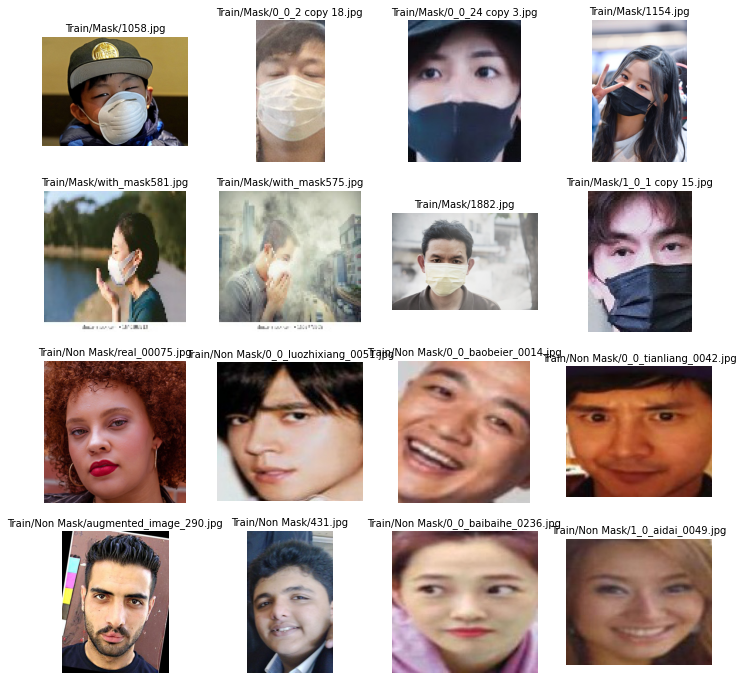

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[0:8]:
  mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[0:8]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_pics = mask_pic+nomask_pic

for i in range(0,len(merged_pics)):
  data = merged_pics[i].split('/',4)[4]
  sp = plt.subplot(4,4,i+1)
  sp.axis('Off')
  image = mpimg.imread(merged_pics[i])
  sp.set_title(data,fontsize=10)
  plt.imshow(image,cmap='gray')

plt.show()

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   zoom_range = 0.2,
                                   rotation_range = 40,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )
valid_generator = validation_datagen.flow_from_directory(valid_dir,
                                                    target_size=(150,150),
                                                    batch_size = 32,
                                                    class_mode = 'binary'
                                                    )

Found 3998 images belonging to 2 classes.
Found 969 images belonging to 2 classes.
Found 714 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [14]:
train_generator.image_shape

(150, 150, 3)

In [15]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding='SAME',activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3),padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [16]:
model.compile(Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(train_generator,
                    epochs = 30,
                    validation_data = valid_generator)

Epoch 1/30
  6/125 [>.............................] - ETA: 30s - loss: 9.3544 - accuracy: 0.5040

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


125/125 [==============================] - 78s 385ms/step - loss: 2.7527 - accuracy: 0.6141 - val_loss: 0.4124 - val_accuracy: 0.8641
Epoch 2/30
125/125 [==============================] - 48s 388ms/step - loss: 0.2739 - accuracy: 0.8944 - val_loss: 0.4285 - val_accuracy: 0.8445
Epoch 3/30
125/125 [==============================] - 48s 385ms/step - loss: 0.2849 - accuracy: 0.8919 - val_loss: 0.2565 - val_accuracy: 0.9258
Epoch 4/30
125/125 [==============================] - 48s 387ms/step - loss: 0.2273 - accuracy: 0.9207 - val_loss: 0.2015 - val_accuracy: 0.9286
Epoch 5/30
125/125 [==============================] - 48s 387ms/step - loss: 0.2151 - accuracy: 0.9227 - val_loss: 0.2540 - val_accuracy: 0.9300
Epoch 6/30
125/125 [==============================] - 48s 388ms/step - loss: 0.1875 - accuracy: 0.9276 - val_loss: 0.2015 - val_accuracy: 0.9342
Epoch 7/30
125/125 [==============================] - 48s 388ms/step - loss: 0.1996 - accuracy: 0.9257 - val_loss: 0.2017 - val_accuracy: 0.9

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

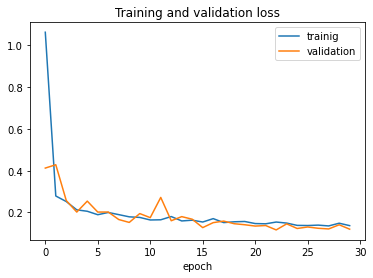

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['trainig','validation'])
plt.title('Training and validation loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

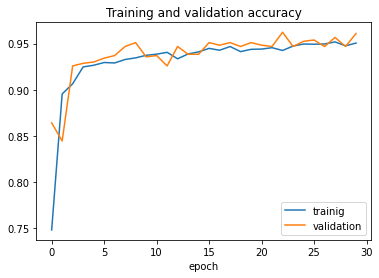

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['trainig','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [21]:
test_loss , test_acc = model.evaluate(test_generator)
print('test acc :{} test loss:{}'.format(test_acc,test_loss))

30/31 [============================>.] - ETA: 0s - loss: 0.1508 - accuracy: 0.9406

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


31/31 [==============================] - 6s 195ms/step - loss: 0.1521 - accuracy: 0.9391
test acc :0.9391124844551086 test loss:0.1521081179380417


In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fname in uploaded.keys():
  img_path='/content/'+fname
  img = image.load_img(img_path , target_size=(150,150))
  images = image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction = model.predict(images)
  print(fname)
  if prediction==0:
    print('mask')
  else:
    print('nomask')

Saving 2070.jpg to 2070.jpg
2070.jpg
mask


In [23]:
model.save('latest.h5')